# Undistort and Perspective Transform

In [1]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import PyQt5
%matplotlib qt


In [2]:
print(os.environ.get('QT_API'))
if 'QT_API' not in os.environ:
    os.environ['QT_API'] = 'pyqt5'
#%matplotlib qt
print(os.environ.get('QT_API'))

None
pyqt5


# Reading the distorting coefficients from the file

In [3]:
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Distorted image

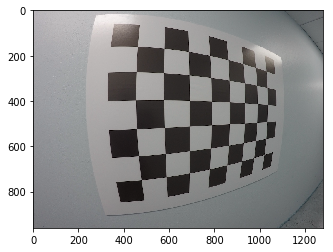

In [8]:
# to have inline plot within the jupyter-notebook
%matplotlib inline 
#%matplotlib auto # to have interactive plot in a separate window

img = cv2.imread("calibration_wide/GOPR0032.jpg")
nx = 8
ny = 6
plt.imshow(img)

# Undistorted the image

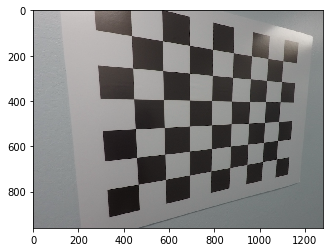

In [9]:
undist = cv2.undistort(img,mtx,dist,None,mtx)
plt.imshow(undist)

# converting to grayscale and finding chess corners

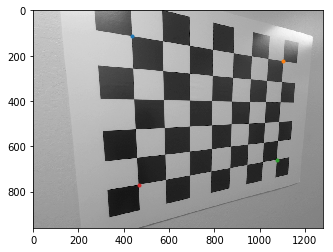

In [5]:
gray = cv2.cvtColor(undist,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray,(nx,ny), None)
plt.imshow(gray, cmap="gray")

plt.plot(corners[0][0][0],corners[0][0][1],'.') # topleft
plt.plot(corners[7][0][0],corners[7][0][1],'.') # top right
plt.plot(corners[47][0][0],corners[47][0][1],'.') # bottom right
plt.plot(corners[40][0][0],corners[40][0][1],'.') # bottomleft

# Defining a perspective transform function

In [6]:
def warp_image(image):
    img_size = (image.shape[1], image.shape[0]) 
    src = np.float32([[corners[0][0][0],corners[0][0][1]],
                      [corners[7][0][0],corners[7][0][1]],
                     [corners[47][0][0],corners[47][0][1]],
                     [corners[40][0][0],corners[40][0][1]]]) # four source coordinates plotted above
    dst = np.float32([[100,100],
                      [1200,100],
                      [1200,870],
                      [100,870]]) # four desired coordinates
    M = cv2.getPerspectiveTransform(src,dst)  # Computing the perspective transform matrix, M
    M_inv = cv2.getPerspectiveTransform(dst,src) # computing the inverse perspective transform matrix, M_inv
    
    # apply the transform M to the original image
    # creates warped image, uses linear interpolation
    warped = cv2.warpPerspective(image, M, img_size, flags=cv2.INTER_LINEAR) 
    
    return warped 

# Ploting the warped image

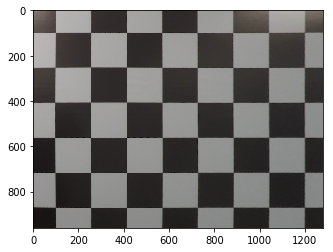

In [7]:
warped_im = warp_image(undist)
plt.imshow(warped_im,cmap="gray")